In [1]:
import torch
print(torch.cuda.is_available())



True


In [ ]:
#sudo rmmod nvidia_uvm
#sudo modprobe nvidia_uvm

SyntaxError: invalid syntax (526804030.py, line 1)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Confirm CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [3]:
# Data transformations: convert to tensor and normalize to [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

# Test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

# Class labels
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


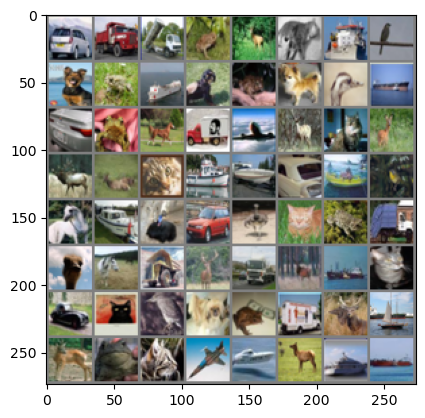

  car truck truck  frog  deer   cat  ship  bird


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Function to unnormalize and show image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))


In [5]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Convolutional layer 1: input channels=3, output channels=6, kernel=5x5
        self.conv1 = nn.Conv2d(3, 6, 5)
        # Convolutional layer 2: input channels=6, output channels=16, kernel=5x5
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5x5 comes from image size reduction
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)           # 10 output classes

    def forward(self, x):
        # Conv1 + ReLU + MaxPool
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        # Conv2 + ReLU + MaxPool
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # Flatten
        x = x.view(-1, 16 * 5 * 5)
        # Fully connected layers with ReLU
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # Output layer (no activation, CrossEntropyLoss will handle softmax)
        x = self.fc3(x)
        return x

# Create the model instance
net = Net()
net.to(device)  # Send to GPU if available

print(net)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [24]:
# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Using Adam optimizer

In [ ]:
for epoch in range(20):  # You can increase this later
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data[0].to(device), data[1].to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 mini-batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Finished Training ✅")


[Epoch 1, Batch 100] loss: 0.382
[Epoch 1, Batch 200] loss: 0.387
[Epoch 1, Batch 300] loss: 0.410
[Epoch 1, Batch 400] loss: 0.446
[Epoch 1, Batch 500] loss: 0.452
[Epoch 1, Batch 600] loss: 0.463
[Epoch 1, Batch 700] loss: 0.454
[Epoch 2, Batch 100] loss: 0.339
[Epoch 2, Batch 200] loss: 0.357
[Epoch 2, Batch 300] loss: 0.360
[Epoch 2, Batch 400] loss: 0.405
[Epoch 2, Batch 500] loss: 0.436
[Epoch 2, Batch 600] loss: 0.425
[Epoch 2, Batch 700] loss: 0.443
[Epoch 3, Batch 100] loss: 0.338
[Epoch 3, Batch 200] loss: 0.347
[Epoch 3, Batch 300] loss: 0.351
[Epoch 3, Batch 400] loss: 0.376
[Epoch 3, Batch 500] loss: 0.422
[Epoch 3, Batch 600] loss: 0.408
[Epoch 3, Batch 700] loss: 0.403
[Epoch 4, Batch 100] loss: 0.317
[Epoch 4, Batch 200] loss: 0.359
[Epoch 4, Batch 300] loss: 0.357
[Epoch 4, Batch 400] loss: 0.364
[Epoch 4, Batch 500] loss: 0.401
[Epoch 4, Batch 600] loss: 0.398
[Epoch 4, Batch 700] loss: 0.390
[Epoch 5, Batch 100] loss: 0.329
[Epoch 5, Batch 200] loss: 0.339
[Epoch 5, 

In [26]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


In [27]:
correct = 0
total = 0

# We don't need gradients for evaluation
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10,000 test images: {100 * correct / total:.2f}%")


Accuracy of the network on the 10,000 test images: 59.46%


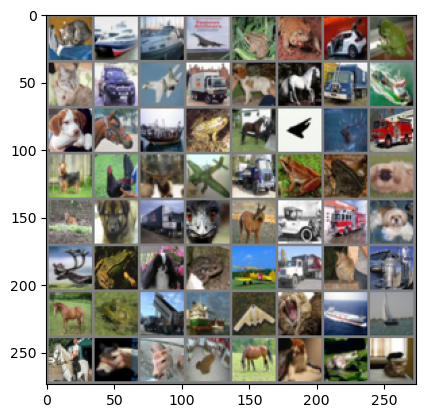

GroundTruth: cat ship ship plane frog frog car frog
Predicted:    cat ship ship ship frog frog car frog


In [14]:
# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Display images
imshow(torchvision.utils.make_grid(images.cpu()))
print("GroundTruth:", ' '.join(f"{classes[labels[j]]}" for j in range(8)))

# Predict
images = images.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print("Predicted:   ", ' '.join(f"{classes[predicted[j]]}" for j in range(8)))


In [28]:
from torchvision import models

# Load pretrained ResNet18
net = models.resnet18(pretrained=True)

# Modify the final fully connected layer to output 10 classes
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 10)

# Move to GPU
net = net.to(device)

print(net)


/home/anik/miniforge3/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/anik/miniforge3/envs/pytorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/anik/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100.0%


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [29]:
criterion = nn.CrossEntropyLoss()

# Often better to fine-tune with Adam or SGD and a higher learning rate
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [30]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Reload datasets with augmentation
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [33]:
for epoch in range(20):  # Increase to 10-20 for best results
    net.train()
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Finished Training ✅")


[Epoch 1, Batch 100] loss: 0.608
[Epoch 1, Batch 200] loss: 0.601
[Epoch 1, Batch 300] loss: 0.598
[Epoch 1, Batch 400] loss: 0.591
[Epoch 1, Batch 500] loss: 0.594
[Epoch 1, Batch 600] loss: 0.614
[Epoch 1, Batch 700] loss: 0.588
[Epoch 2, Batch 100] loss: 0.572
[Epoch 2, Batch 200] loss: 0.529
[Epoch 2, Batch 300] loss: 0.628
[Epoch 2, Batch 400] loss: 0.684
[Epoch 2, Batch 500] loss: 0.577
[Epoch 2, Batch 600] loss: 0.583
[Epoch 2, Batch 700] loss: 0.561
[Epoch 3, Batch 100] loss: 0.567
[Epoch 3, Batch 200] loss: 0.529
[Epoch 3, Batch 300] loss: 0.518
[Epoch 3, Batch 400] loss: 0.530
[Epoch 3, Batch 500] loss: 0.553
[Epoch 3, Batch 600] loss: 0.536
[Epoch 3, Batch 700] loss: 0.546
[Epoch 4, Batch 100] loss: 0.503
[Epoch 4, Batch 200] loss: 0.545
[Epoch 4, Batch 300] loss: 0.501
[Epoch 4, Batch 400] loss: 0.495
[Epoch 4, Batch 500] loss: 0.494
[Epoch 4, Batch 600] loss: 0.514
[Epoch 4, Batch 700] loss: 0.521
[Epoch 5, Batch 100] loss: 0.460
[Epoch 5, Batch 200] loss: 0.476
[Epoch 5, 

In [34]:
net.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on the 10,000 test images: {100 * correct / total:.2f}%")


Accuracy on the 10,000 test images: 85.11%
